In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import missingno as msno

Seaborn is a powerful tool for data visualization in Python, especially when performing statistical analysis. It complements Matplotlib by providing a high-level interface that simplifies the process of creating attractive and informative visualizations. Whether you are exploring datasets, identifying patterns, or presenting findings, Seaborn offers a variety of functions to help you achieve your goals efficiently.

Jupyter Magic Command: %matplotlib inline is used to ensure plots render within Jupyter Notebook cells.

Matplotlib Styling: style.use('fivethirtyeight') applies a modern and visually appealing style to Matplotlib plots inspired by FiveThirtyEight.

Seaborn Configuration: sns.set(style='whitegrid', color_codes=True) configures Seaborn to use a grid-based style with color palettes that enhance the readability and aesthetics of the plots.

In [2]:
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [3]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [4]:
training_data=pd.read_csv('/kaggle/input/dataset-file/train.csv')
test_data=pd.read_csv('/kaggle/input/dataset-file/test.csv')

In [5]:
sample_data=pd.read_csv('/kaggle/input/testdata/sample_submission.csv')

In [6]:
test_data.shape

(1459, 80)

In [7]:
print(sample_data.columns)

Index(['Id', 'SalePrice'], dtype='object')


In [8]:
sample_data.shape

(1459, 2)

In [9]:
print(test_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
test_data = test_data.merge(sample_data[['Id', 'SalePrice']], on='Id', how='left')

In [11]:
print(test_data.columns)
test_data.shape

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(1459, 81)

In [12]:
training_data.head(10)
training_data.shape

(1460, 81)

**Now we start Exploratory Data Analysis**

In [13]:
df=training_data.copy()
df.shape

(1460, 81)

In [14]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [15]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,177150.989247
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,172070.659229
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,175110.956520
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,162011.698832
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,160726.247831


We can drop the 'Id' column as the frames are already indexed.

In [16]:
# df.drop(['Id'],axis=1,inplace=True)
# test_data.drop(['Id'],axis=1,inplace=True)

In [17]:
print("Columns in df:", df.columns)

Columns in df: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCon

In [18]:
df.shape

(1460, 81)

In [19]:
df.index

RangeIndex(start=0, stop=1460, step=1)

Check For Missing Values

In [20]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

visual overview of missing data in a dataset.

<Axes: >

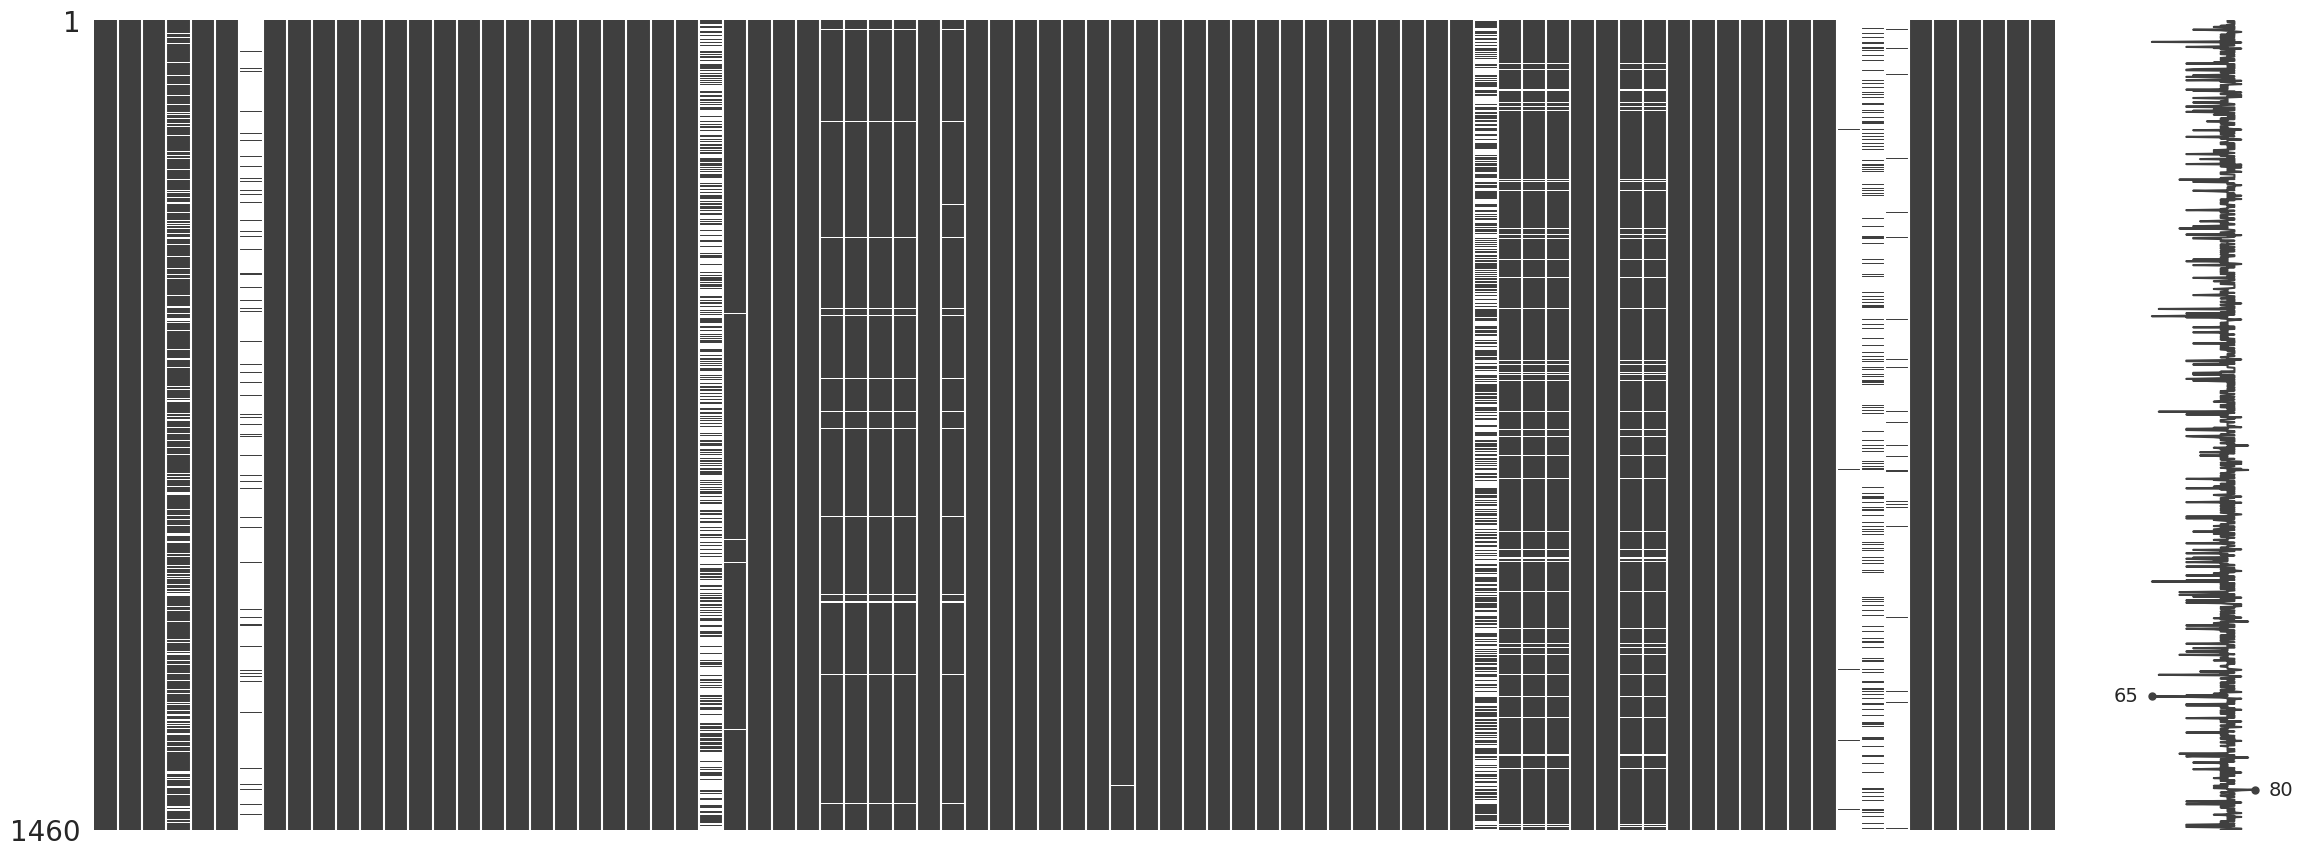

In [21]:
msno.matrix(df) 

Many columns have missing values and that will be treated later

# Separate Dataframes (depending on data type)

Might be useful when we consider features of different data types.

CATEGORICAL FEATURES

In [22]:
cat_df=df.select_dtypes(include='object')

In [23]:
cat_df.head(10)
cat_df.shape

(1460, 43)

In [24]:
cat_df.columns 

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

NUMERIC FEATURES

In [25]:
num_df=df.select_dtypes(include='number')
num_df.shape

(1460, 38)

In [26]:
num_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

FEATURES WITH MISSING VALUES

In [27]:
nan_df=df.loc[:, df.isna().any()]
nan_df.shape

(1460, 19)

In [28]:
nan_df.columns   

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [29]:
df.shape

(1460, 81)

MERGING THE TRAIN & TEST SETS

In [30]:
all_data=pd.concat([training_data,test_data])

In [31]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
all_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [33]:
print(all_data.shape)

(2919, 81)


Beacuse of Merging index has got disordered so reset the index

In [34]:
all_data = all_data.reset_index(drop=True)

In [36]:
print(all_data.loc[1461:,'SalePrice'])

1461    187758.393989
1462    183583.683570
1463    179317.477511
1464    150730.079977
1465    177150.989247
            ...      
2914    167081.220949
2915    164788.778231
2916    219222.423400
2917    184924.279659
2918    187741.866657
Name: SalePrice, Length: 1458, dtype: float64


In [37]:
# note that it is Nan for the values in test set as expected. so we drop it here for now.
# all_data.drop(['SalePrice'],axis=1,inplace=True)


**Analyzing the Target i.e. 'SalePrice'**

Text(0.5, 1.0, 'Sale Price')

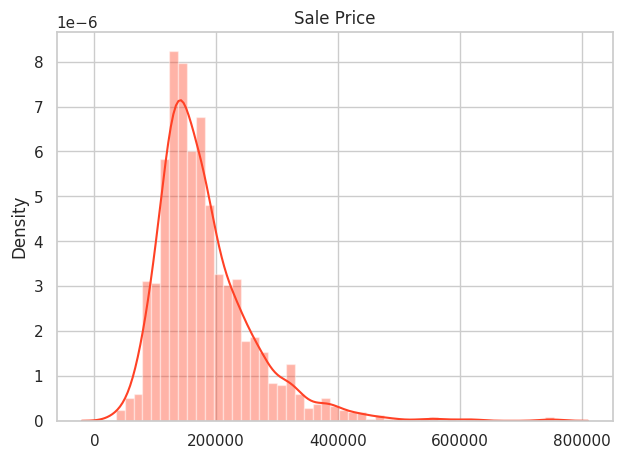

In [38]:
# analyzing the target variable ie 'Saleprice'
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('Sale Price')

scipy.stats is a powerful tool for statistical analysis and probability distributions. It provides functionality for generating random variables, performing statistical tests, fitting data to distributions, and creating plots like Q-Q plots.

In [39]:
from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

The distribution of target is a bit right skewed. Hence taking the 'log transform' is a reasonable option.

ALSO LINEAR REGRESSION IS BASED ON THE ASSUMPTION OF THE 'HOMOSCADESITY' AND HENCE TAKING LOG WILL BE A GOOD IDEA TO ENSURE 'HOMOSCADESITY' (that the varince of errors is constant.). A bit scary but simple ;)

check if data follows a theoretical distribution

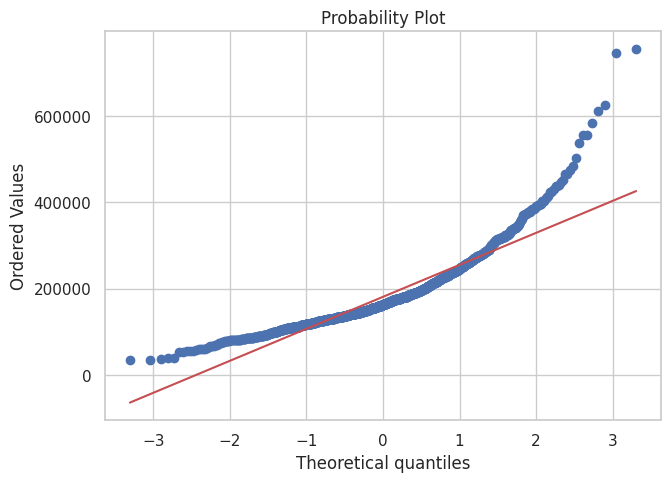

In [40]:
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)
plt.show()

TAKING 'Log Transform' OF THE TARGET

In [41]:
df['SalePrice']=np.log1p(df['SalePrice'])

Text(0.5, 1.0, 'log(1+SalePrice)')

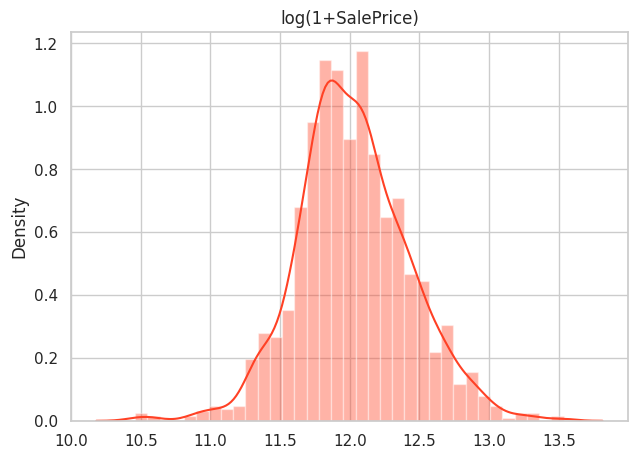

In [42]:
# now again see the distribution.
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('log(1+SalePrice)')  # better.

In [43]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [44]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
cor_mat = numeric_df.corr()

**Most Related Features to the Target**

In [45]:
# cor_mat= df[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [46]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

INFERENCES--
Note that some of the features have quite high corelation with the target. These features are really significant.

Of these the features with corelation value >0.5 are really important. Some features like GrLivArea etc.. are even more important.

We will consider these features (i.e. GrLivArea,OverallQual) etc.. in more detail in subsequent sections during univariate and bivariate analysis.

In [47]:
# using a corelation map to visualize features with high corelation.
cor_mat= df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd','SalePrice']].corr()
mask = np.array(cor_mat)

<Axes: >

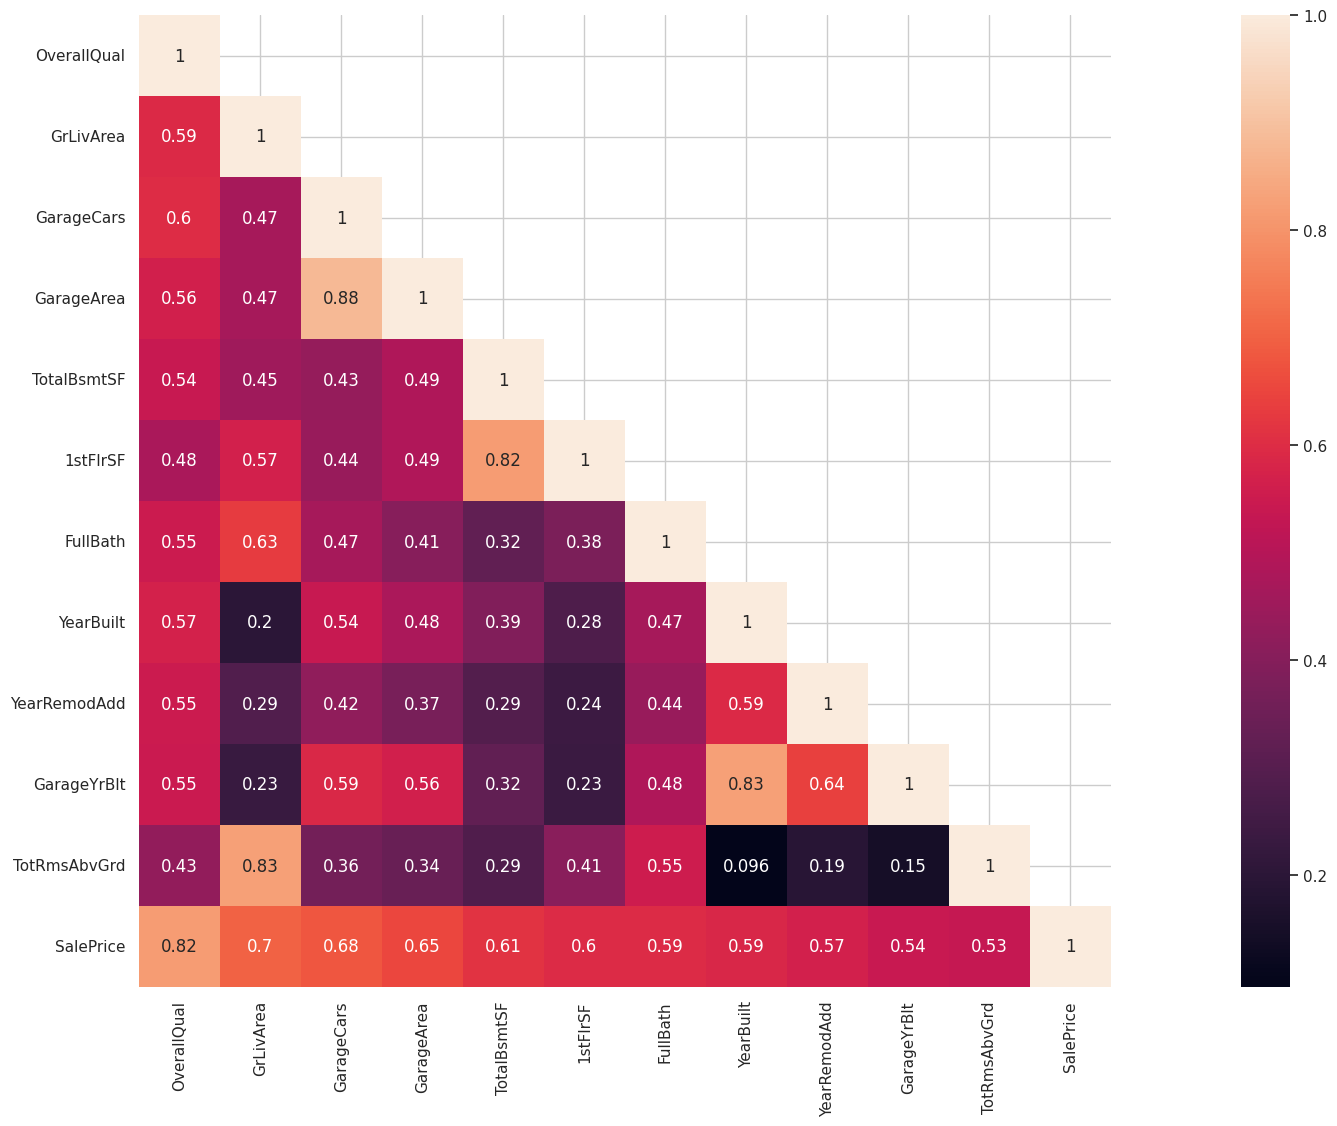

In [48]:
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**Univariate Analysis**

In this section the univariate analysis is performed; More importantly I have considered the features that are more importanht with the 'Target' that have high corelation with the Target.

For the numeric features I have used a 'distplot' and 'boxplot' to analyze their distribution.

Similarly for categorical features the most reasonable way to visualize the distribution is to use a 'countplot' which shows the relative counts for each category or class. Can use a pie-plot also to be a bit more fancy.

Purpose of the Boxplot:

Shows the distribution of the feature, including the median, quartiles, and potential outliers. It helps identify the spread and skewness of the feature as well as any unusual values.

Purpose of the Distribution Plot:

Visualizes the distribution of the feature values, showing the frequency of values within different ranges and providing insights into the feature’s overall distribution shape, skewness, and modality

For NUMERIC FEATURES

In [49]:
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

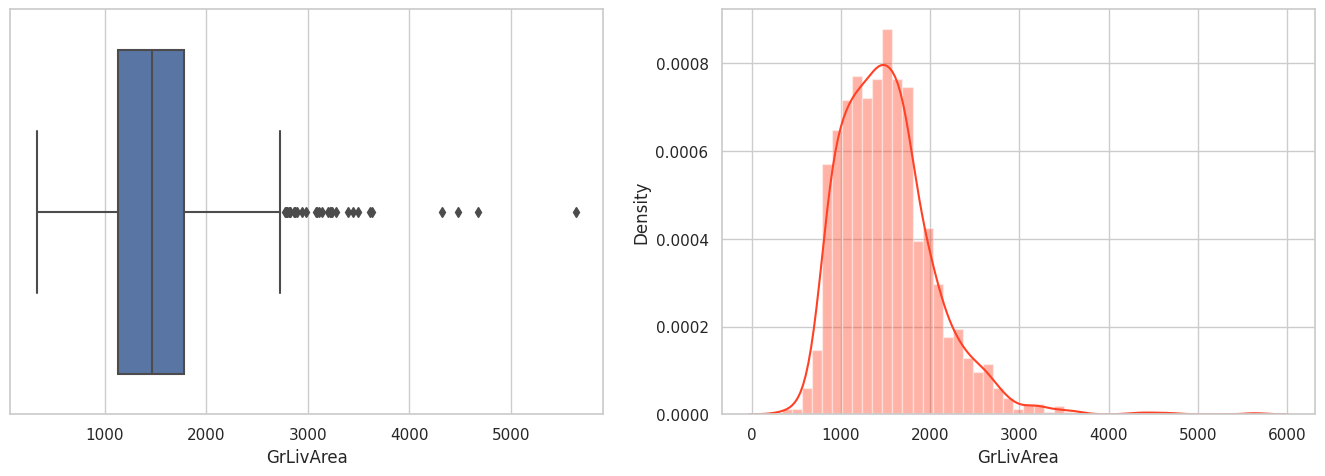

In [50]:
plot_num('GrLivArea')

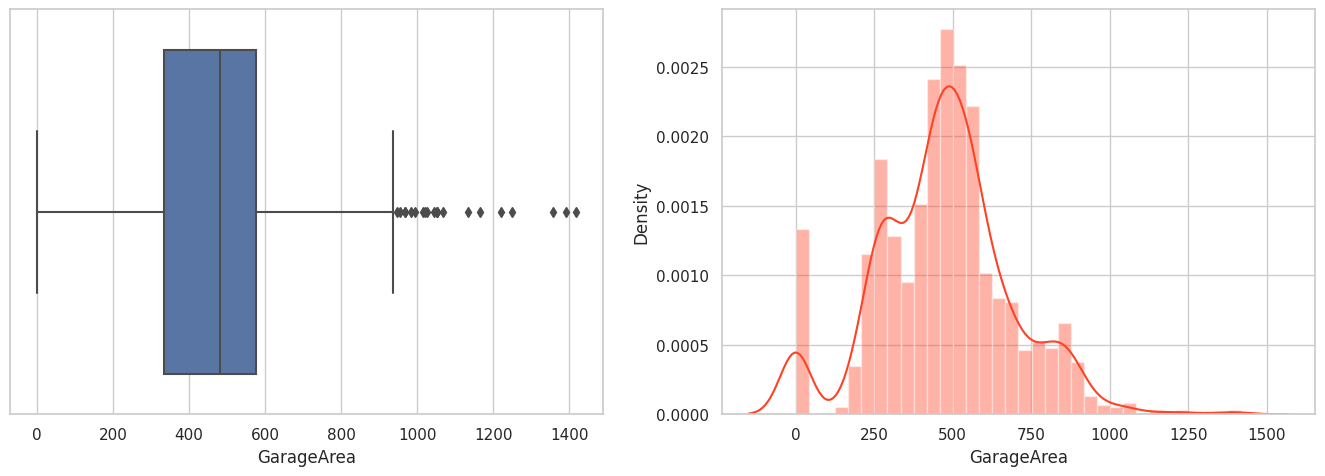

In [51]:
plot_num('GarageArea')

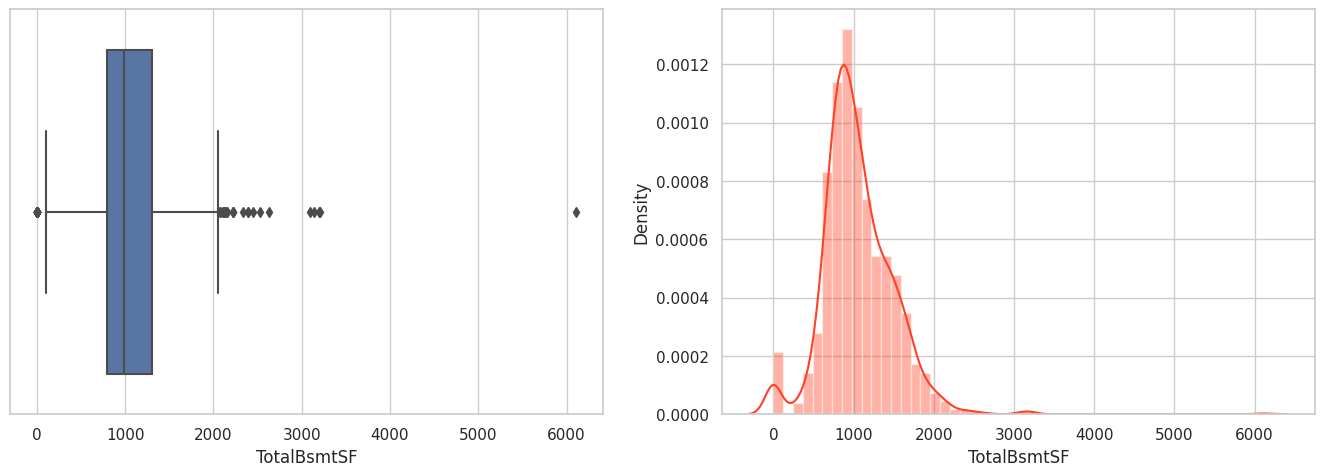

In [52]:
plot_num('TotalBsmtSF') 

Note the features are a bit right skewed. We can therefore take 'log transform' of the features or a BoXCox transformation. Both shall work well.

FOR CATEGORICAL FEATURES

In [53]:
def plot_cat(feature):
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)

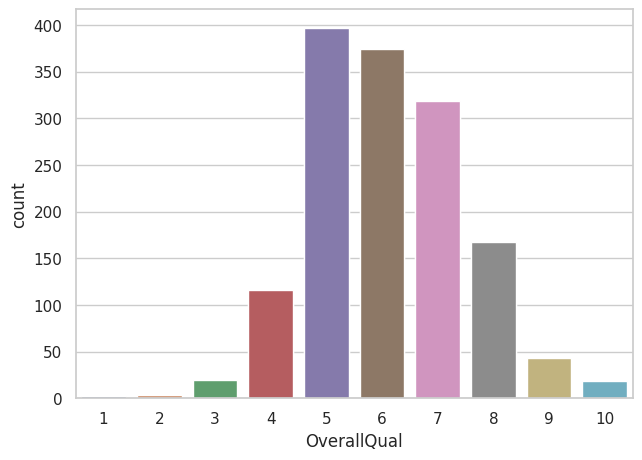

In [54]:
plot_cat('OverallQual')

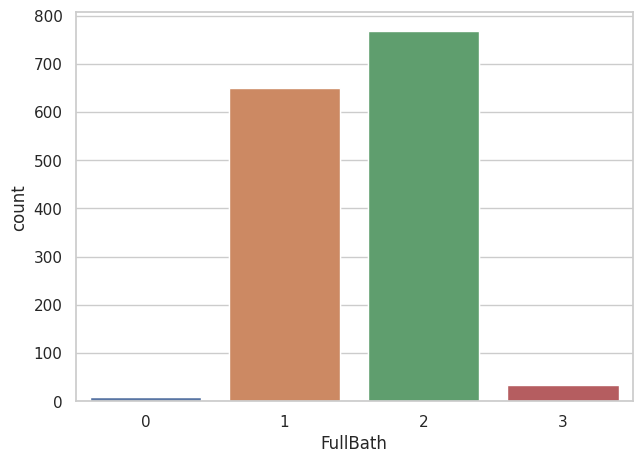

In [55]:
plot_cat('FullBath')

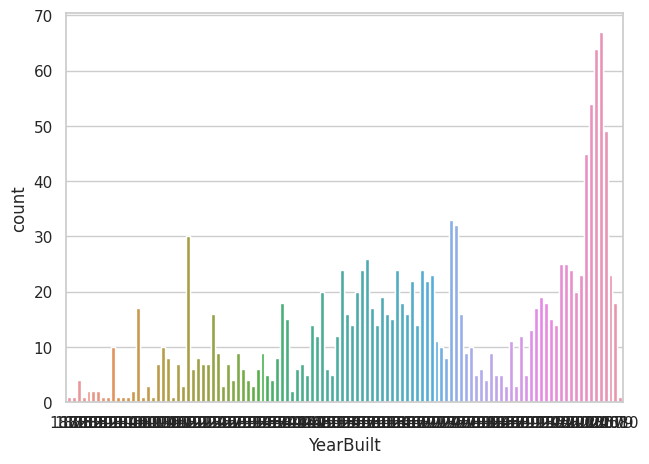

In [56]:
plot_cat('YearBuilt')

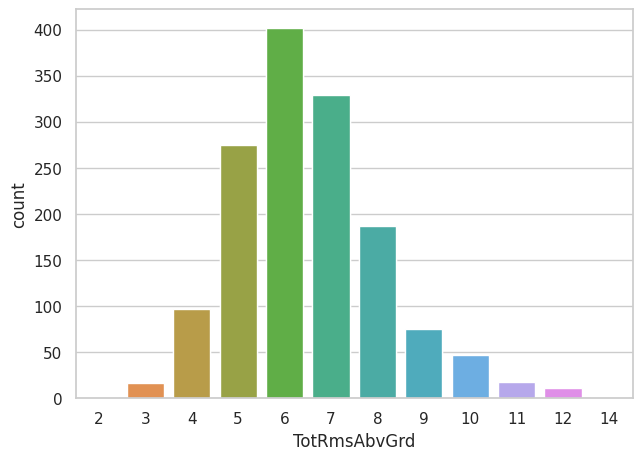

In [57]:
plot_cat('TotRmsAbvGrd')

Lastly we plot the countplot for some important features that are numerical here but are actually categorica. It seems if they have been label encoded.

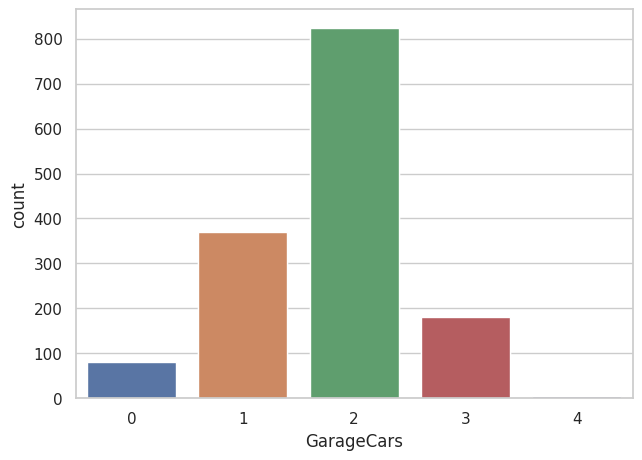

In [58]:
plot_cat('GarageCars')

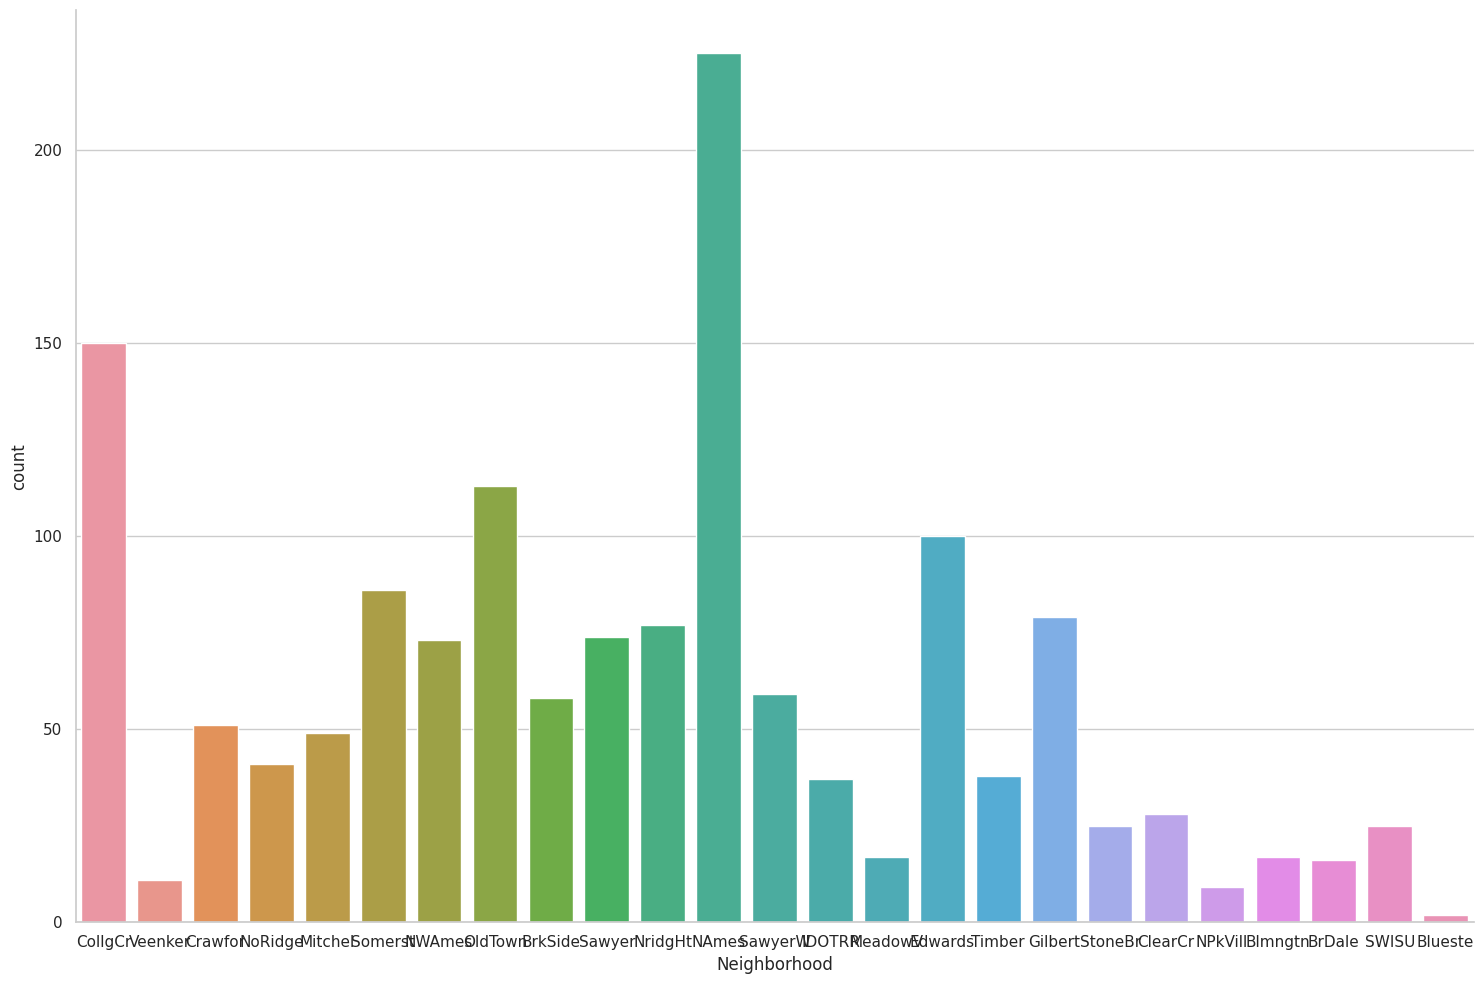

In [59]:
sns.catplot(data=df,x='Neighborhood',kind='count',height=10,aspect=1.5)

# Bivariate Analysis

In this section the Bivariate Analysis have been done. I have plotted various numeric as well as categorical features against the target ie 'SalePrice'.

For Numeric Features

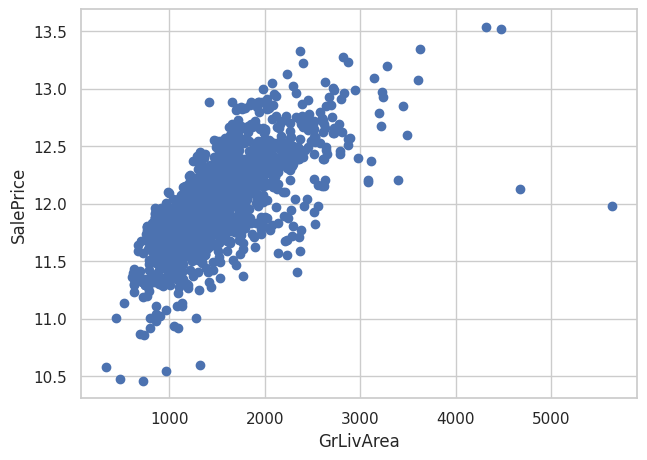

In [60]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

Note that there are two outliers on the lower right hand side and can remove them

In [61]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<13)].index) # removing some outliers on lower right side.

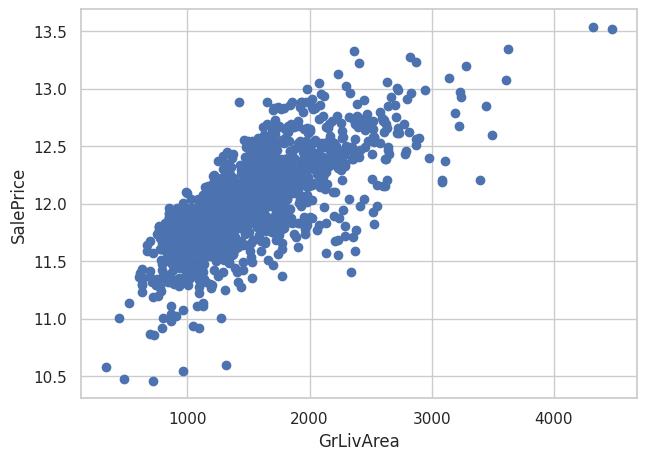

In [62]:
# again checking
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

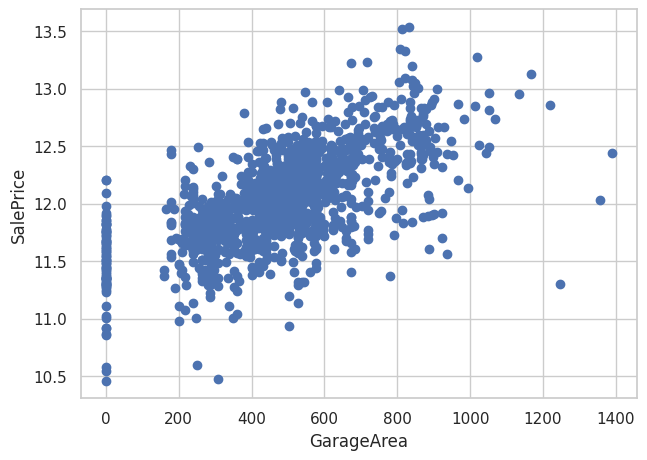

In [63]:
# garage area
fig, ax = plt.subplots()
ax.scatter(x =(df['GarageArea']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

In [64]:
df = df.drop(df[(df['GarageArea']>1200) & (df['SalePrice']<12.5)].index)

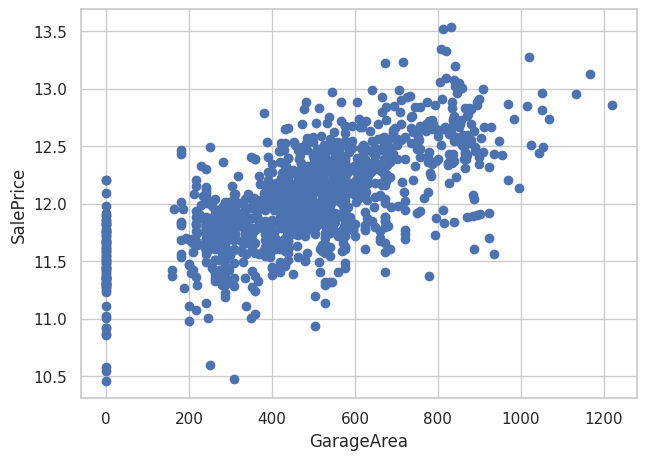

In [65]:
# garage area
fig, ax = plt.subplots()
ax.scatter(x =(df['GarageArea']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

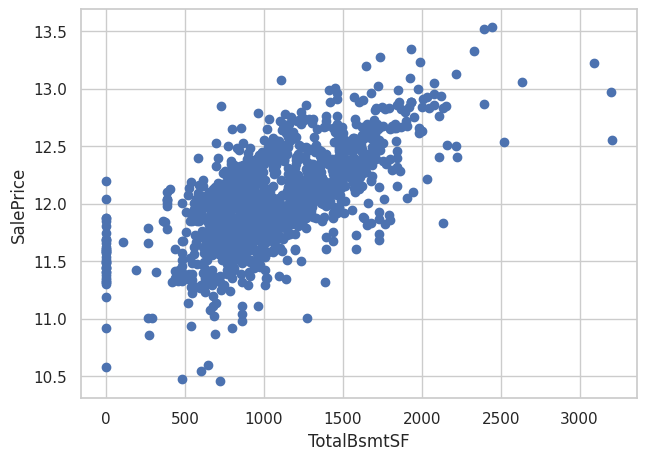

In [66]:
# basment area
fig, ax = plt.subplots()
ax.scatter(x =(df['TotalBsmtSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()   

In [67]:
df = df.drop(df[(df['TotalBsmtSF']>3000) & (df['SalePrice']<13.5)].index)

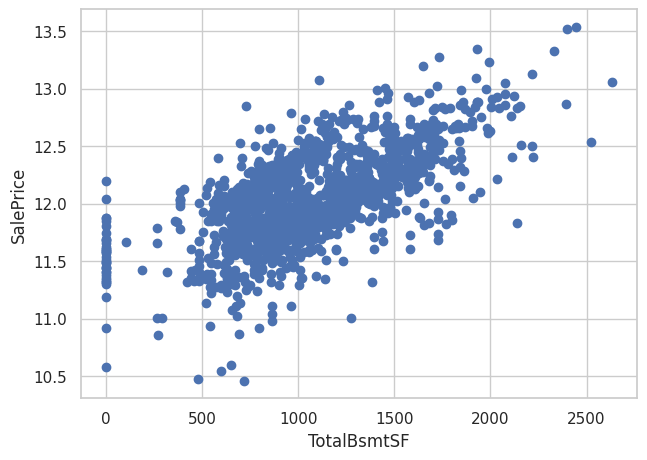

In [68]:
# basment area
fig, ax = plt.subplots()
ax.scatter(x =(df['TotalBsmtSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()  

For Catagorical Features

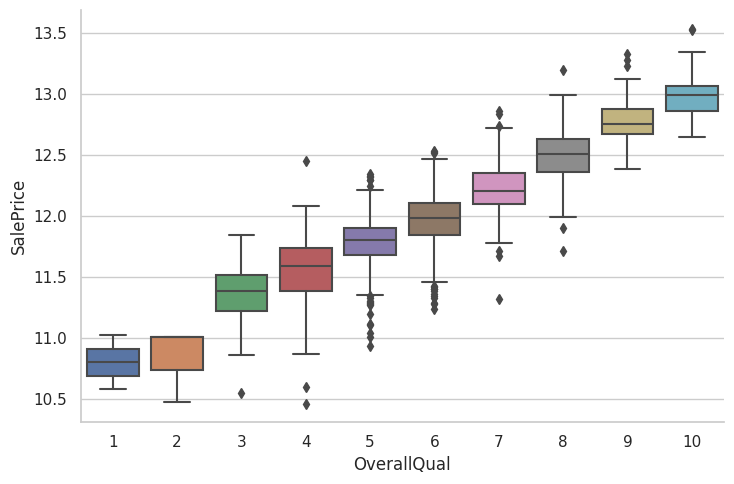

In [69]:
#overall qual
sns.catplot(data=df,x='OverallQual',y='SalePrice',kind='box',height=5,aspect=1.5)

The SalePrice increases with the overall quality as expected.

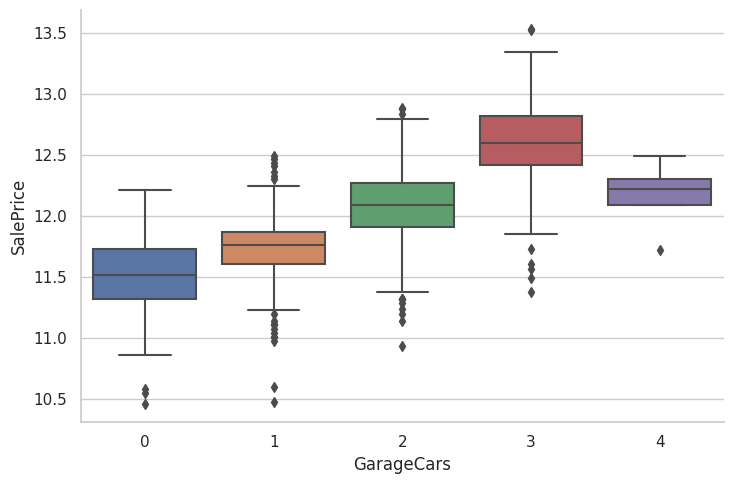

In [70]:
#garage cars
sns.catplot(data=df,x='GarageCars',y='SalePrice',kind='box',height=5,aspect=1.5)

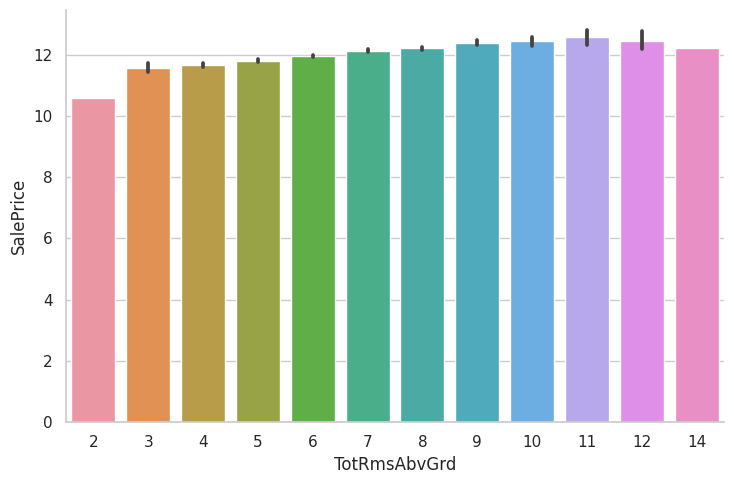

In [71]:
#no of rooms
sns.catplot(data=df,x='TotRmsAbvGrd',y='SalePrice',kind='bar',height=5,aspect=1.5) # increasing rooms imply increasing SalePrice as expected.

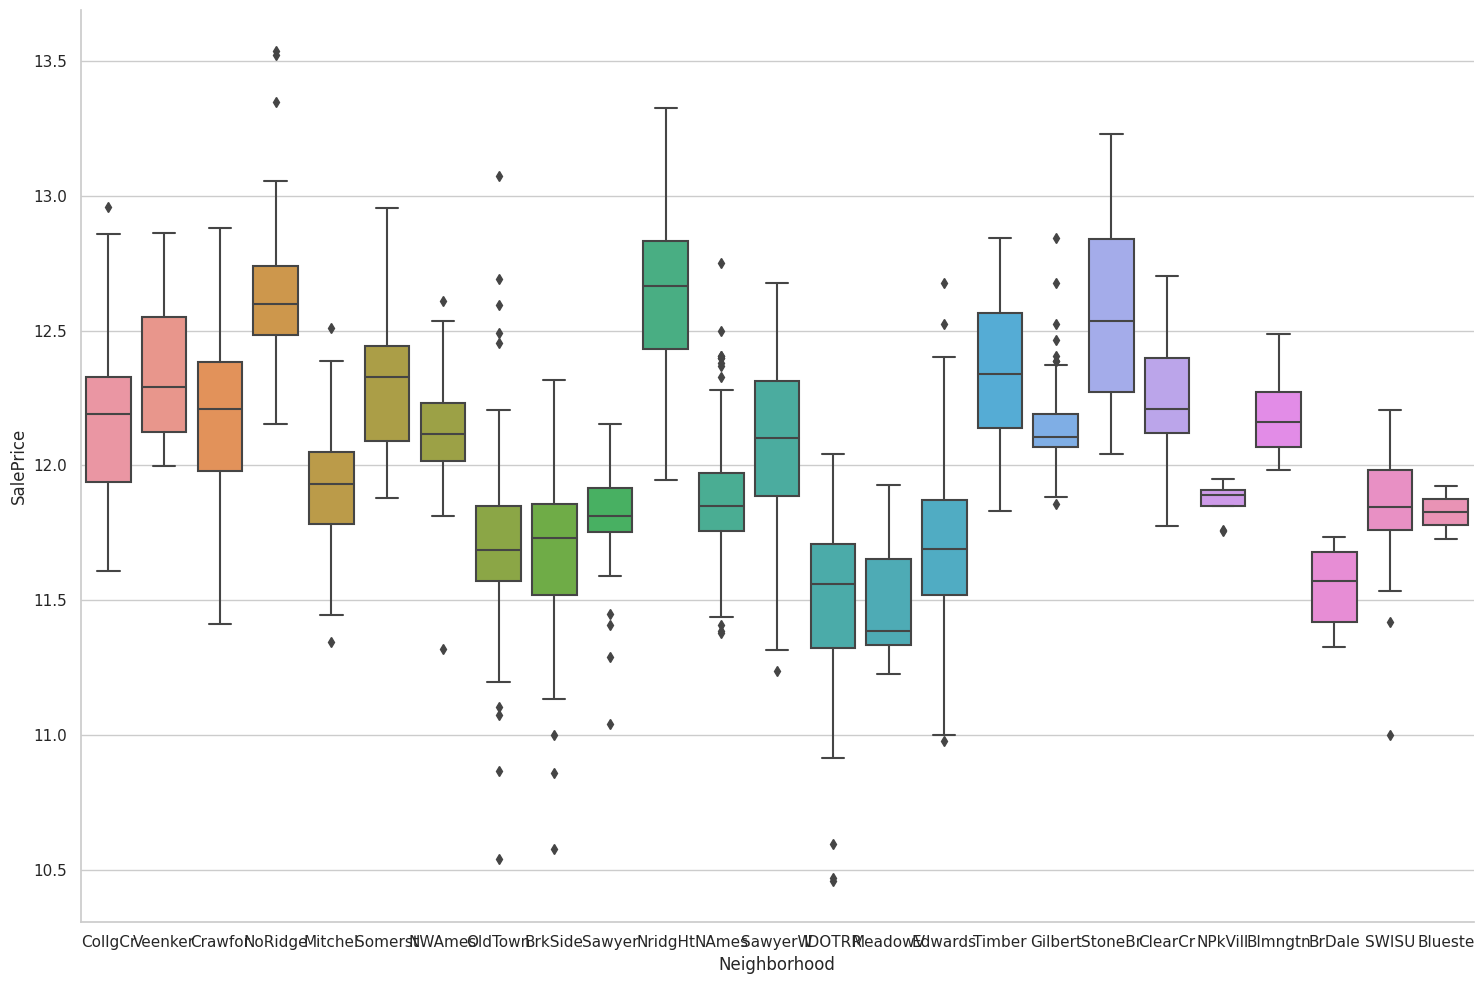

In [72]:
#neighborhood
sns.catplot(data=df,x='Neighborhood',y='SalePrice',kind='box',height=10,aspect=1.5)

Price varies with neighborhood.More posh areas of the city will have more price as expected.

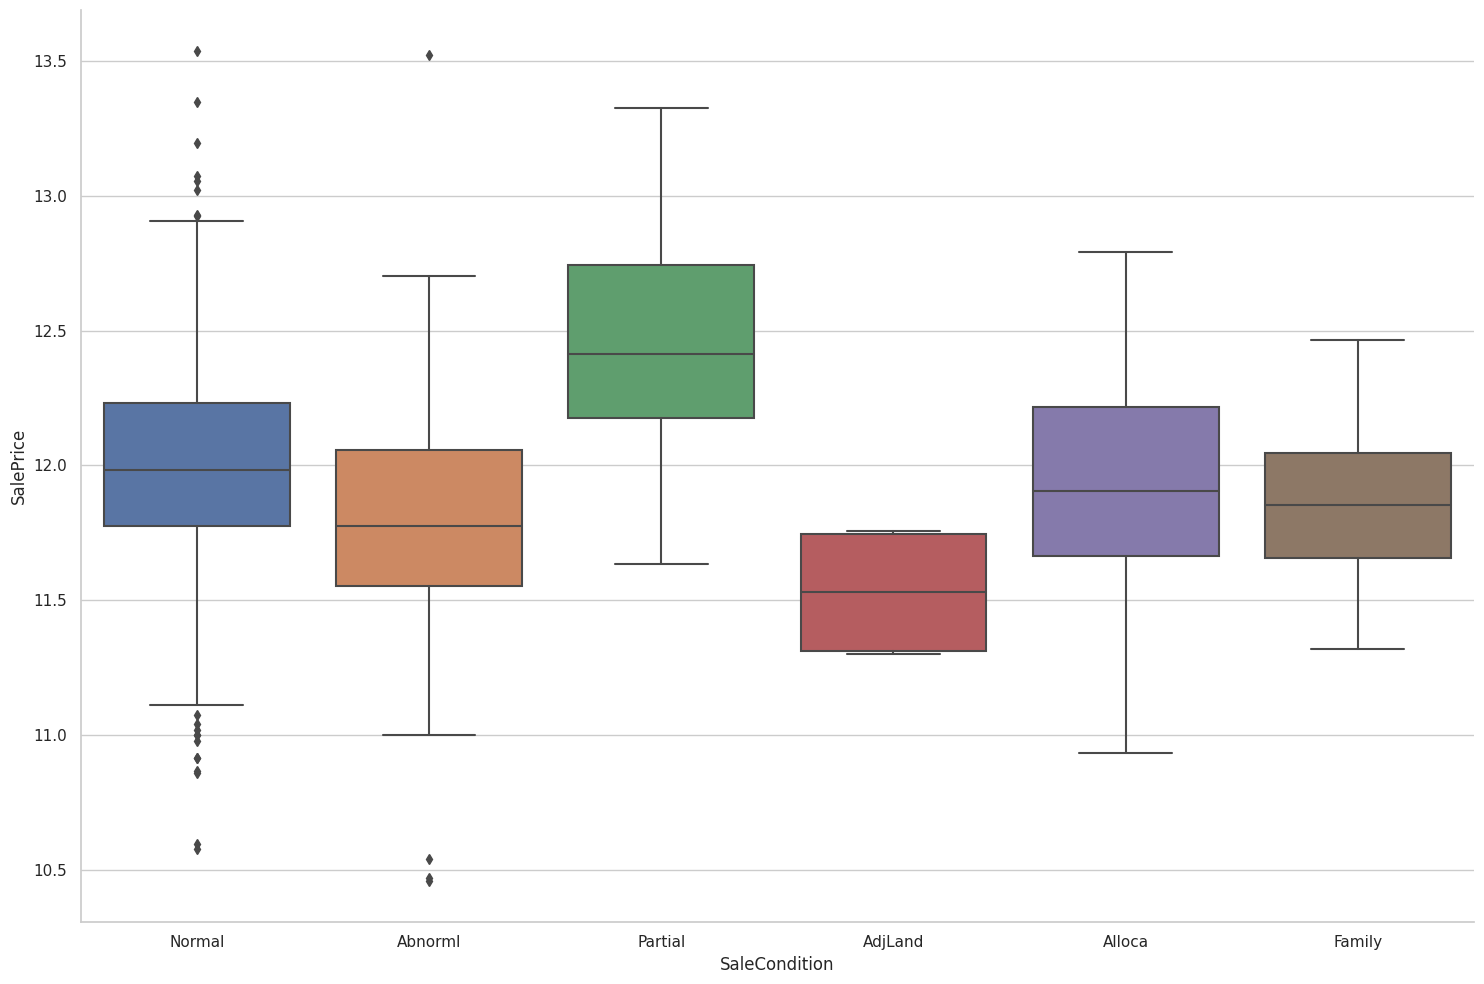

In [73]:
#sale conditioin
sns.catplot(data=df,x='SaleCondition',y='SalePrice',kind='box',height=10,aspect=1.5)

# Missing Value Treatment

In this section of the notebook I have handled the missing values in the columns.

Firstly I have droped a couple of columns that have a really high % of missing values.

For other features I have analyzed if it that feaure is important or not and accordingly either have drooped it or imputed the values in it.

For imputation I have considered the meaning of the corressponding feature from the description. Like for a categorical feature if values are missing I have imputed "None" just to mark a separate category meaning absence of that thing. Similarly for a numeric feature I have imputed with 0 in case the missing value implies the 'absence' of that feature.

In all other cases I have imputed the categorical features with 'mode' i.e the most frequent class and with 'mean' for the numeric features.

Summarizes the number of True values (i.e., the number of missing values) for each column. The result is a Series with column names as the index and the count of missing values as the values.

nan_all_data[nan_all_data == 0].index: Identifies the columns where the number of missing values is zero (i.e., no missing values). This returns an index of column names with zero missing values.

.drop(...): Removes these columns from nan_all_data, so only columns with missing values remain.

.sort_values(ascending=False): Sorts the remaining columns in descending order based on the number of missing values. This makes it easier to identify which columns have the most missing values.

In [75]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)

In [76]:
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageFinish,159
GarageQual,159
GarageCond,159


In [78]:
#delete some features withvery high number of missing values.  
all_data.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)

In [79]:
test_data.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)

In [80]:
# FireplaceQu
# it is useful but many of the values nearly half are missing makes no sense to fill half of the values. so deleting this
all_data.drop(['FireplaceQu'],axis=1,inplace=True)
test_data.drop(['FireplaceQu'],axis=1,inplace=True)
df.drop(['FireplaceQu'],axis=1,inplace=True)

float64
count    1195.000000
mean       69.689540
std        23.155649
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
The corelation of the LotFrontage with the Target :  0.3558786203663999


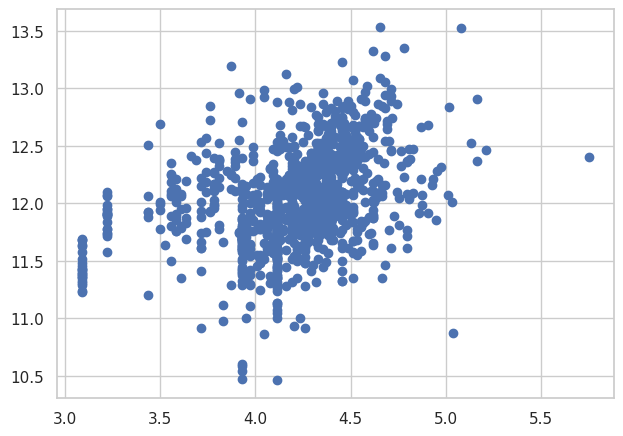

In [82]:
#Lot Frontage
print(df['LotFrontage'].dtype)
plt.scatter(x=np.log1p(df['LotFrontage']),y=df['SalePrice'])
cr=numeric_df.corr()
print(df['LotFrontage'].describe())
print("The corelation of the LotFrontage with the Target : " , cr.loc['LotFrontage','SalePrice'])

Above analysis shows that there is some relation of LotArea with the SalePrice both by scatter plot and also by the corelation value. Therefore instead of deleting I will impute the values with the mean for now.

In [83]:
all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)
all_data['LotFrontage'].isna().sum()

0

In [85]:
#Garage  related features.
# these features eg like garage qual,cond,finish,type seems to be important and relevant for buying car. 
# hence I will not drop these features insted i will fill them with the 'none' for categorical and 0 for numeric as nan here implies that there is no garage.

all_data['GarageYrBlt'].fillna(0,inplace=True)
print(all_data['GarageYrBlt'].isnull().sum())

all_data['GarageArea'].fillna(0,inplace=True)
print(all_data['GarageArea'].isnull().sum())

all_data['GarageCars'].fillna(0,inplace=True)
print(all_data['GarageCars'].isnull().sum())

all_data['GarageQual'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageQual'].isnull().sum())

all_data['GarageFinish'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageFinish'].isnull().sum())

all_data['GarageCond'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageCond'].isnull().sum())

all_data['GarageType'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageType'].isnull().sum())

0
0
0
0
0
0
0


In [87]:
# basement related features.
#missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)
    
# for categorical features we will create a separate class 'none' as before.

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)
    
print(all_data['TotalBsmtSF'].isnull().sum())

0


In [88]:
# MasVnrArea 0 and MasVnrType 'None'.
all_data['MasVnrArea'].fillna(0,inplace=True)
print(all_data['MasVnrArea'].isnull().sum())

all_data['MasVnrType'].fillna('None',inplace=True)
print(all_data['MasVnrType'].isnull().sum())

0
0


In [90]:
#MSZoning.
# Here nan does not mean no so I will with the most common one ie the mode.
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
print(all_data['MSZoning'].isnull().sum())

0


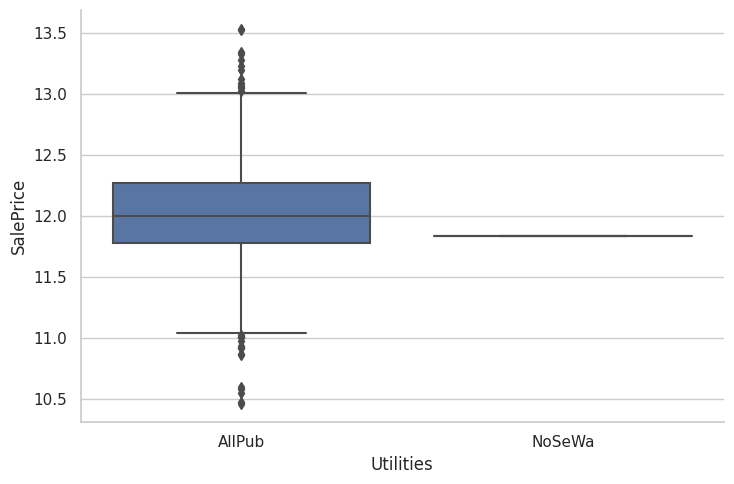

In [92]:
# utilities
sns.catplot(data=df,kind='box',x='Utilities',y='SalePrice',height=5,aspect=1.5)

Note that training set has only 2 of the possible 4 categories (ALLPub and NoSeWa) while test set has other categories. Hence it is of no use to us.

In [93]:
all_data.drop(['Utilities'],axis=1,inplace=True)

In [95]:
#functional
# fill with mode
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)
print(all_data['Functional'].isnull().sum())

0


In [97]:
# other rem columns rae all cat like kitchen qual etc.. and so filled with mode.
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  all_data[col].fillna(all_data[col].mode()[0],inplace=True)
  print(all_data[col].isnull().sum())

0
0
0
0
0


In [99]:
# Lastly checking if any null value still remains.
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio


In [101]:
all_data.shape

(2919, 75)

# Handling Skewness

For handling skewnesss I will take the log transform of the features with skewness > 0.5

In [ ]:
# #log transform skewed numeric features:
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# skewed_feats = training_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.50]
# skewed_feats = skewed_feats.index

# all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [102]:
all_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000.0
7,8,60,RL,69.305795,10382,Pave,IR1,Lvl,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000.0


# Data Preparation

For catagorical features we use LableEncoder() which convert each category to unique integer

In [103]:
from sklearn.preprocessing import LabelEncoder

for col in all_data.columns:
    if(all_data[col].dtype == 'object'):
        le=LabelEncoder()
        all_data[col]=le.fit_transform(all_data[col])

In [104]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Encl

Splitting into Training and Validation Sets

In [105]:
train=all_data.loc[:(df.shape)[0]+2,:]
test=all_data.loc[(df.shape)[0]+2:,:]

In [106]:
# train['SalePrice']=df['SalePrice']
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape
print(train['SalePrice'].isnull().sum())

0


In [107]:
print(train.shape)
print(test.shape)

(1455, 75)
(1465, 75)


In [111]:
test.to_csv('test_with_EDA_final_1.csv', index=False)
train.to_csv('train_with_EDA_final_1.csv', index=False)

In [ ]:
test.columns


In [109]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.000000,8450,1,3,3,4,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.000000,9600,1,3,3,2,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,68.000000,11250,1,0,3,4,0,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,60.000000,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,84.000000,14260,1,0,3,2,0,...,0,0,0,0,0,12,2008,8,4,250000.0
5,6,50,3,85.000000,14115,1,0,3,4,0,...,0,320,0,0,700,10,2009,8,4,143000.0
6,7,20,3,75.000000,10084,1,3,3,4,0,...,0,0,0,0,0,8,2007,8,4,307000.0
7,8,60,3,69.305795,10382,1,0,3,0,0,...,228,0,0,0,350,11,2009,8,4,200000.0
8,9,50,4,51.000000,6120,1,3,3,4,0,...,205,0,0,0,0,4,2008,8,0,129900.0
9,10,190,3,50.000000,7420,1,3,3,0,0,...,0,0,0,0,0,1,2008,8,4,118000.0
